# Vlasov equation


\begin{equation} \left\{\begin{matrix}
\frac{\mathrm{d}\mathbf{x}_\epsilon}{\mathrm{d}t}&=& \mathbf{v}_\epsilon, & \hspace{1cm} \mathbf{x}_\epsilon(s) = \mathbf{x}\\
\frac{\mathrm{d}\mathbf{v}_\epsilon}{\mathrm{d}t} &=& \frac{1}{\epsilon}\left(\mathbf{v}_\epsilon\times \mathcal{M}(\mathbf{x}_\varepsilon)\right) +\mathbf{v}_\varepsilon \times \mathbf{e}_3,& \hspace{1cm}\mathbf{v}_\epsilon(s)=\mathbf{v}
\end{matrix}\right. 
\end{equation}
with $\displaystyle{\mathcal{M}(\mathbf{x})= \frac{1}{\sqrt{x_1^2+x_2^2}} \begin{pmatrix}-\mathbf{x}_2 \\ \mathbf{x}_1 \\ 0\end{pmatrix}}$


## Strong variable magnetic field

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import parareal as para
import HamiltonianFunctions as func
import RK4 as RK4
import RK2 as RK2
import StrongVariableMagneticField as SVMF
s = 0
eps = 0.001
x = np.longdouble([0,1,1])
v = np.longdouble([1,eps,0])
y0 = np.concatenate((x,v))
T = 500*eps
N = 8
delta_t = T/N
kmax = 8



In [2]:
y_tab=SVMF.tab_RK4_magnetic(func.VariableMagneticField,s,T,y0,T/6400,eps)


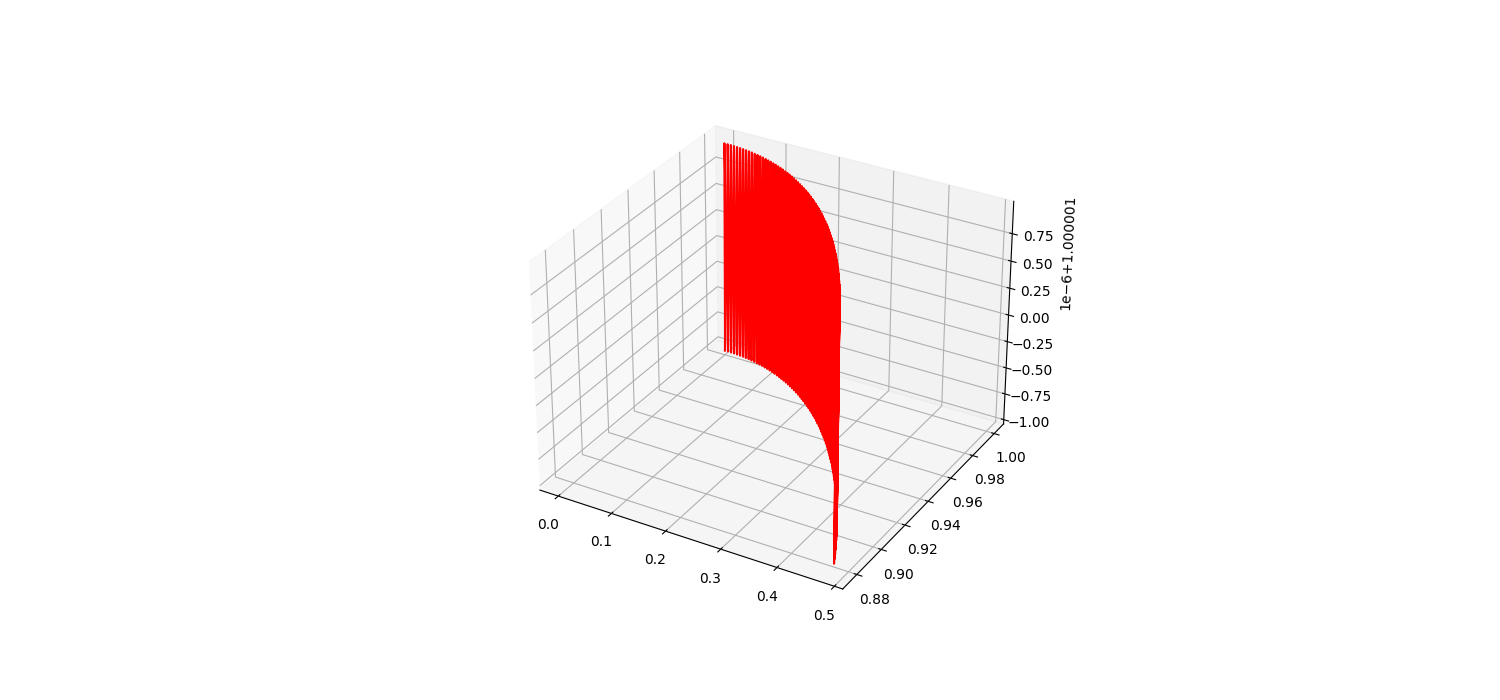

In [3]:
%matplotlib widget

fig = plt.figure(figsize=(15,7))
ax = plt.axes(projection='3d')

ax.plot3D(y_tab[0],y_tab[1],y_tab[2], 'red')

In [4]:
test= SVMF.approx_tab(s,np.linspace(0,T,N+1),y0,T/N,eps)

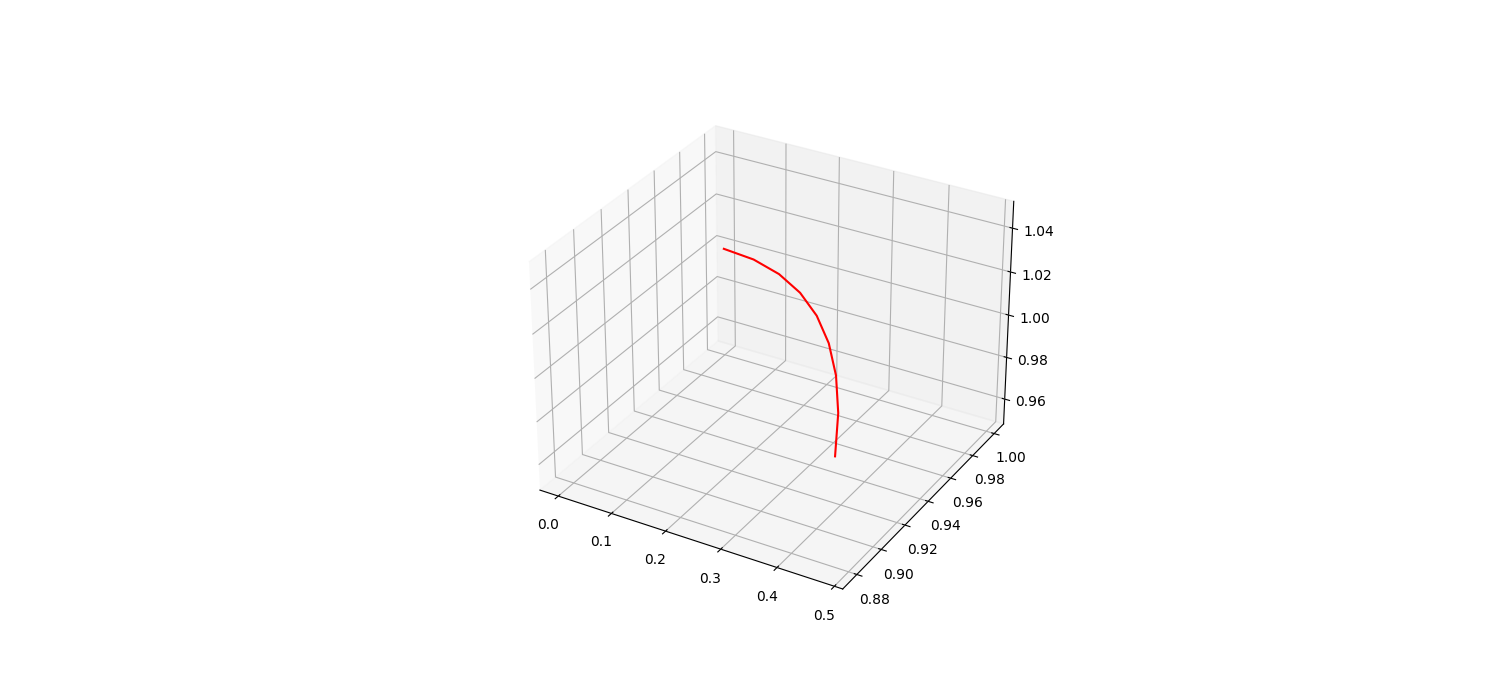

In [5]:
fig1 = plt.figure(figsize=(15,7))
ax1 = plt.axes(projection='3d')

ax1.plot3D(test[:,0],test[:,1],test[:,2], 'red')

In [6]:
sol = SVMF.parareal_bis_magnetic(func.VariableMagneticField,SVMF.RK4_magnetic,SVMF.approx,y0,eps,T/6400,delta_t,T,kmax)

T: 0.5
N: 8
delta_t: 0.0625
eps: 0.001
kmax: 8
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8


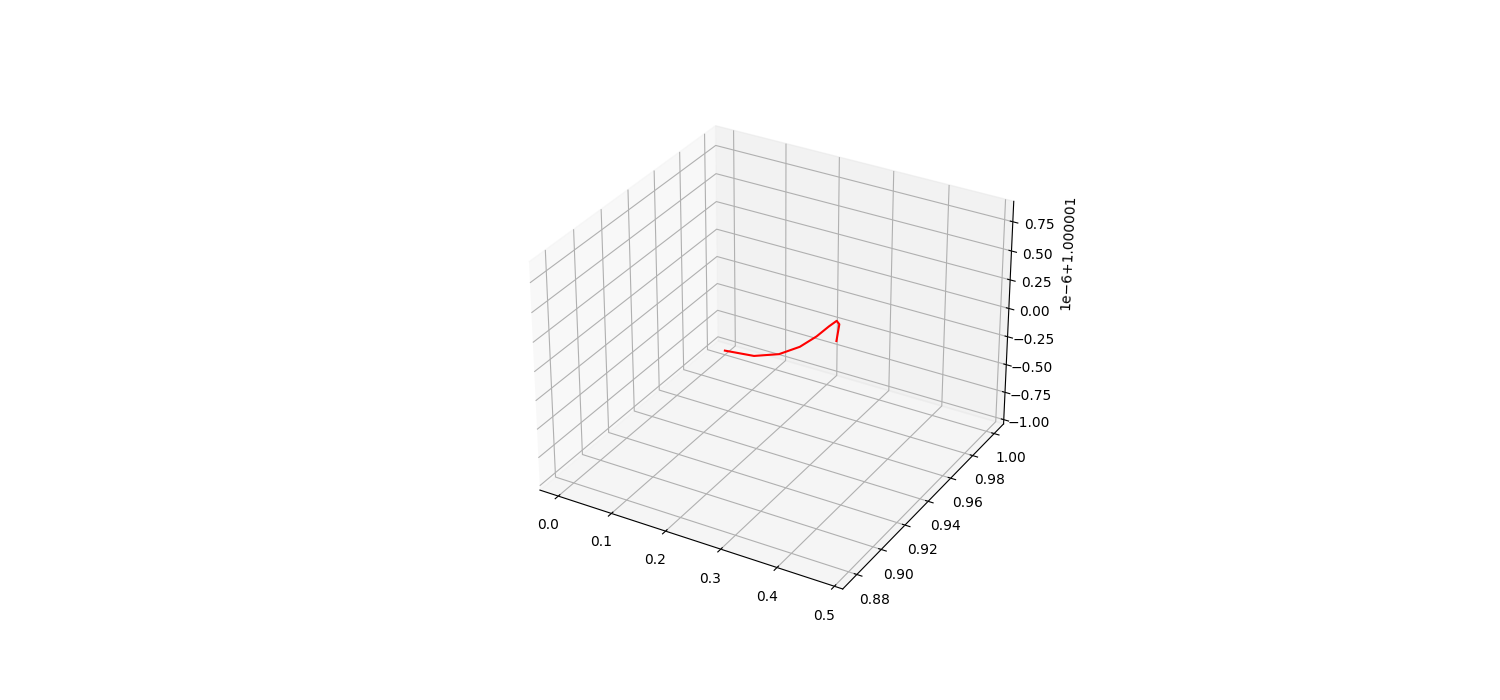

In [7]:
fig2 = plt.figure(figsize=(15,7))
ax2 = plt.axes(projection='3d')

ax2.plot3D(sol[-1,:,0],sol[-1,:,1],sol[-1,:,2], 'red')

[7.24885447e-07 7.55182350e-10 6.89849881e-13 4.16092128e-15
 4.31709410e-15 3.94518040e-15 4.12544603e-15 4.19705321e-15
 4.07212371e-15]


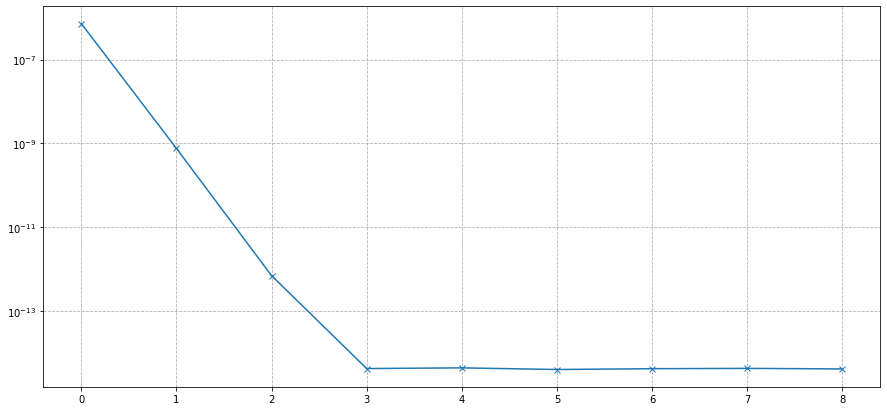

In [11]:

fig4,ax4 = plt.subplots(1,figsize=(15,7))

y_tab = SVMF.tab_RK4_magnetic(func.VariableMagneticField,s,T,y0,T/6400,eps)
normans = np.zeros(N+1)
for n in range(N+1):
    normans[n] = np.linalg.norm(y_tab[:,800*n],1)
maxans = np.max(normans)
err = np.zeros((kmax+1,N+1))
Err= np.zeros(kmax+1)
for k in range(kmax+1):
    for n in range(N+1):
        err[k,n]= np.linalg.norm(y_tab[:,n*800] - sol[k+1,n,:],1)
    Err[k] = np.max(err[k])/maxans
ax4.grid(True, which="both", ls="dashed")
ax4.plot([k for k in range(kmax+1)],Err,'x-')
ax4.set_yscale('log')
print(Err)